## Distributed Machine Learning (S1-24_AIMLCZG515) Academic Year 2024-2025

## Assignment 1 : Explore and implement vertical and horizontal partitioning of AI models

### DML Group 15
#### Contribution
1. Hemant Kumar Parakh (2023AA05741)
2. Sushil Kumar (2023aa05849)
3. TANU MADAAN (2023aa05511)
4. AISHWARY SHUKLA (2023aa05448)

Dataset Name - Cellular Network Data Analysis

Dataset CSV - signal_metrics.csv

## Problem Statement
### Part 2: Practical Implementation (60 Points)

You are given a pre-trained model for predicting network latency and a dataset with the following attributes:
* Tower ID
* Signal Strength (dBm)
*	Network Traffic (MB)
*	Latency (ms)
*	User Count
*	Device Type

#### Tasks:
1.	Vertical Partitioning (30 Points)
* Split the original model into two sub-models:
  * Model A: Processes features related to the network (e.g., Signal Strength, Network Traffic).
  * Model B: Processes features related to user behavior (e.g., User Count, Device Type).
* Combine the outputs of Model A and Model B to predict network latency.
* Compare the performance of the partitioned model to the original monolithic model using metrics like accuracy and latency prediction error.
2.	Horizontal Partitioning (30 Points)
* Divide the dataset into two subsets based on geographic categories:
  * Subset 1: Urban cell towers.
  * Subset 2: Rural cell towers.
* Train separate models for each subset and compare their performance to a single model trained on the entire dataset.
* Provide insights into the benefits of horizontal partitioning in this scenario.
________________________________________
### Part 3: Industry-Oriented Analysis (30 Points)
1.	Based on your partitioning experiments:
  * Recommend scenarios where vertical partitioning is more effective.
  * Suggest situations better suited for horizontal partitioning.
2.	Prepare a concise report or presentation for a potential Qualcomm use case:
  * How can these techniques improve scalability and performance in 5G network optimization?
  * What challenges might arise in deployment, and how would you address them?
________________________________________


## Dataset: Cellular Network Data Analysis
Dataset link: https://www.kaggle.com/datasets/suraj520/cellular-network-analysis-dataset

This dataset, provides realistic signal metrics for 3G, 4G, 5G, and LTE network analysis using DragonOS, Spike, and SDR devices. The dataset aims to provide a representative sample of signal measurements for various network types and locations in Bihar, India.

In [1]:
#Import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

## Step: Loading the data

In [2]:
# Path to the zip file
#try:
#  zip_file_path = '/content/drive/MyDrive/Colab Notebooks/DML-assignment-1/ACI-IoT-2023.csv.zip'
#except:
#  zip_file_path = 'sample_data/ACI-IoT-2023.csv.zip'

#zip_file_path = 'ACI-IoT-2023.csv.zip'
extracted_file_path = '/content/signal_metrics.csv'  # Path where the extracted CSV will be saved

# Extract the CSV file from the zip archive
#with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#    zip_ref.extractall()  # Extract to current directory or specify a path if needed

# Load the extracted CSV file into a DataFrame
data = pd.read_csv(extracted_file_path)

# Display the first few rows of the dataset
print(data.head())


                    Timestamp           Locality   Latitude  Longitude  \
0  2023-05-05 12:50:40.000000           Anisabad  25.599109  85.137355   
1  2023-05-05 12:53:47.210173        Fraser Road  25.433286  85.070053   
2  2023-05-05 12:56:54.420346  Boring Canal Road  25.498809  85.211371   
3  2023-05-05 13:00:01.630519            Danapur  25.735138  85.208400   
4  2023-05-05 13:03:08.840692    Phulwari Sharif  25.538556  85.159860   

   Signal Strength (dBm)  Signal Quality (%)  Data Throughput (Mbps)  \
0             -84.274113                 0.0                1.863890   
1             -97.653121                 0.0                5.132296   
2             -87.046134                 0.0                1.176985   
3             -94.143159                 0.0               68.596932   
4             -94.564765                 0.0               38.292038   

   Latency (ms) Network Type  BB60C Measurement (dBm)  \
0    129.122914           3G                 0.000000   
1     54

In [3]:
# Check the number of rows and columns and provide observations
rows, columns = data.shape
print("No of rows: ", rows)
print("No of columns: ", columns)

No of rows:  16829
No of columns:  12


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16829 entries, 0 to 16828
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     16829 non-null  object 
 1   Locality                      16829 non-null  object 
 2   Latitude                      16829 non-null  float64
 3   Longitude                     16829 non-null  float64
 4   Signal Strength (dBm)         16829 non-null  float64
 5   Signal Quality (%)            16829 non-null  float64
 6   Data Throughput (Mbps)        16829 non-null  float64
 7   Latency (ms)                  16829 non-null  float64
 8   Network Type                  16829 non-null  object 
 9   BB60C Measurement (dBm)       16829 non-null  float64
 10  srsRAN Measurement (dBm)      16829 non-null  float64
 11  BladeRFxA9 Measurement (dBm)  16829 non-null  float64
dtypes: float64(9), object(3)
memory usage: 1.5+ MB


## Step: Data Cleaning

In [5]:
#Check duplicate rows in data
duplicate_rows = data[data.duplicated()]
print("Number of duplicate rows :: ", duplicate_rows.shape)
data = data.drop_duplicates()

#looking for null values
print("Null values :: ")
print(data.isnull().sum())

# Drop columns that are not useful or contain too many missing values
data = data.dropna(axis=1, how='all')  # Drop columns that are completely NaN

# Handle missing values if any (we can also impute or drop rows with missing values)
data.fillna(method='ffill', inplace=True)

Number of duplicate rows ::  (0, 12)
Null values :: 
Timestamp                       0
Locality                        0
Latitude                        0
Longitude                       0
Signal Strength (dBm)           0
Signal Quality (%)              0
Data Throughput (Mbps)          0
Latency (ms)                    0
Network Type                    0
BB60C Measurement (dBm)         0
srsRAN Measurement (dBm)        0
BladeRFxA9 Measurement (dBm)    0
dtype: int64


<ipython-input-5-6003b87eee7d>:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


## Step: Data Visualization

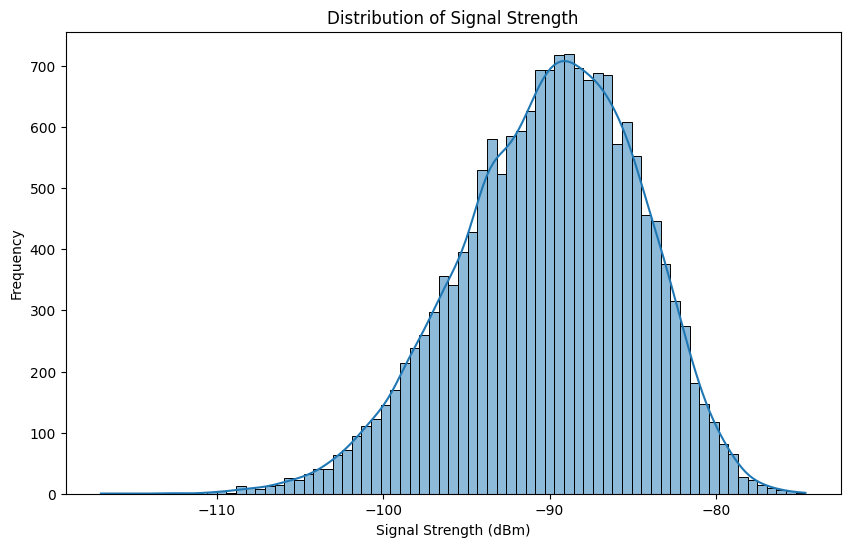

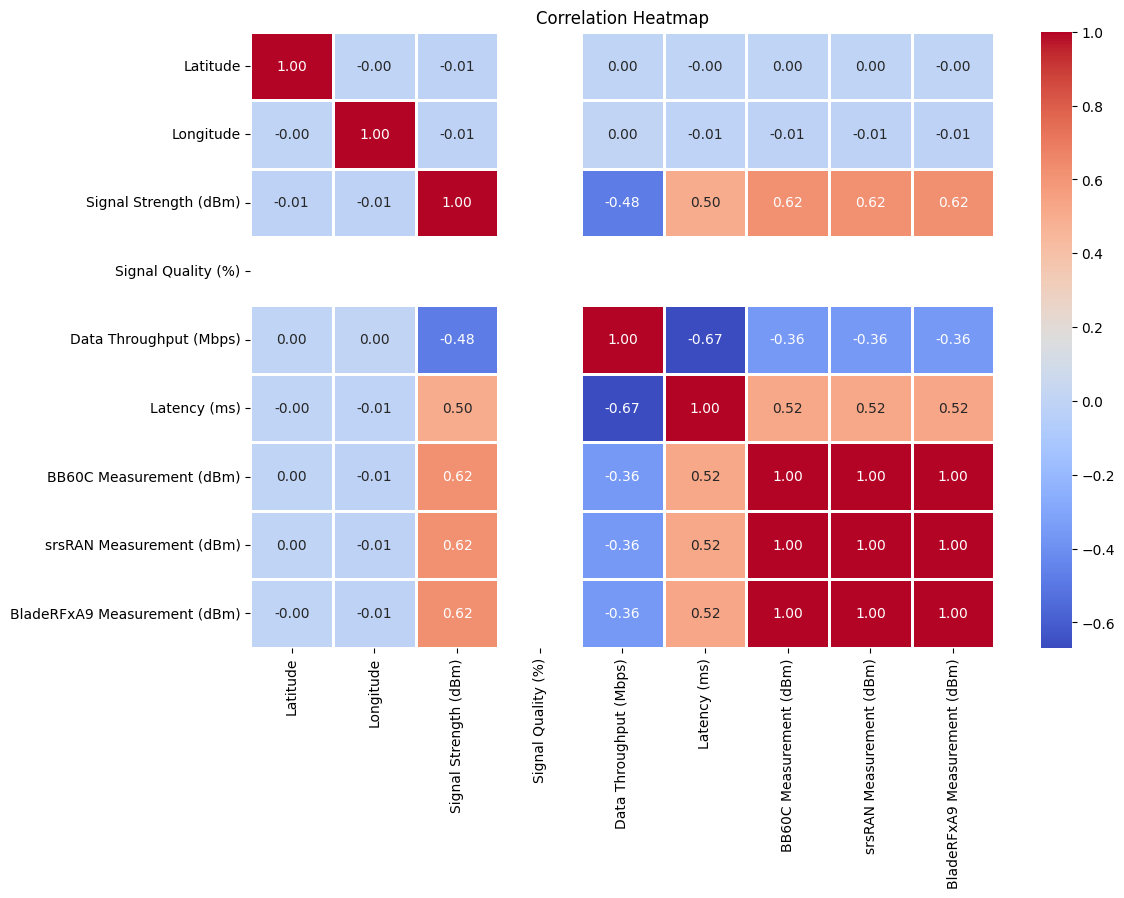

In [6]:
# Visualizing the distribution of the 'Signal Strength' column
plt.figure(figsize=(10, 6))
sns.histplot(data['Signal Strength (dBm)'], kde=True)
plt.title('Distribution of Signal Strength')
plt.xlabel('Signal Strength (dBm)')
plt.ylabel('Frequency')
plt.show()

# Select only numerical columns for correlation calculation
numerical_data = data.select_dtypes(include=['float64'])

# Visualizing correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = numerical_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Heatmap')
plt.show()


#### Distribution of Latencies recorded across the dataset

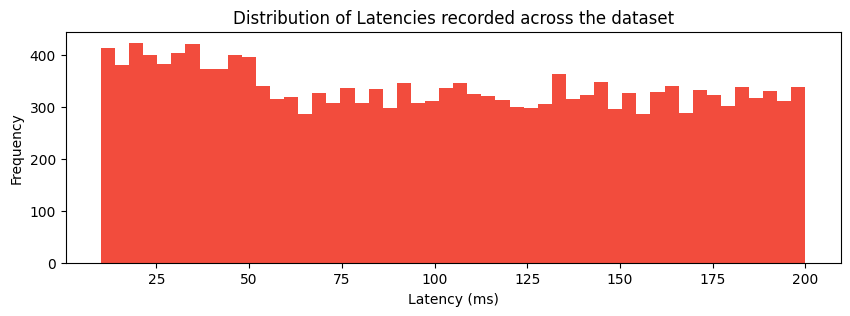

In [7]:
plt.figure(figsize=(10,3))
plt.hist(data["Latency (ms)"], bins=50, color="#F24C3D")
plt.xlabel("Latency (ms)")
plt.ylabel("Frequency")
plt.title("Distribution of Latencies recorded across the dataset")
plt.show()

We can perform more data visualization steps to understand better about signal distribution and various features. But that is not the focus area for the assignment.

## Step: Feature Engineering
For this dataset, we could engineer features such as:

Location-based features: Based on Latitude and Longitude, we could compute the distance from certain key locations or cluster the data based on geographic regions.
Time-related features: Extract the hour of the day, day of the week, and month from the Timestamp column, as network performance might vary over time.

### Data Preprocessing
Before splitting the dataset or applying the model, the data needs to be preprocessed:

Timestamp Conversion: Convert the 'Timestamp' column to datetime format for time-related analysis.

In [8]:
# Convert 'Timestamp' to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')
#data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')
#data['Timestamp'] = pd.to_datetime(data['Timestamp'], infer_datetime_format=True, errors='coerce')


data['Hour'] = data['Timestamp'].dt.hour
data['DayOfWeek'] = data['Timestamp'].dt.dayofweek
data['Month'] = data['Timestamp'].dt.month



#### Encoding Categorical Variables

Handling Categorical Features: The columns like 'Locality' and 'Network Type' are categorical, so we need to encode them.

In [9]:
from sklearn.preprocessing import LabelEncoder

# Handle categorical variables by encoding (Label Encoding for simplicity)
label_encoder = LabelEncoder()
data['Locality'] = label_encoder.fit_transform(data['Locality'])
data['Network Type'] = label_encoder.fit_transform(data['Network Type'])



Scaling Numerical Features: Scaling features such as 'Signal Strength', 'Data Throughput', and 'Latency' helps improve model performance.

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_columns = ['Signal Strength (dBm)', 'Signal Quality (%)', 'Data Throughput (Mbps)',
                     'Latency (ms)', 'BB60C Measurement (dBm)', 'srsRAN Measurement (dBm)',
                     'BladeRFxA9 Measurement (dBm)']

data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


### Step: Vertical Partitioning
Model A (Network-related features):
This model will use features like Signal Strength, Network Type, and other network performance-related columns.

Model B (User behavior-related features):
This model will use features like User Count, Device Type, and locality-based features.


**RandomForestRegressor** is used because it is a powerful ensemble learning method that offers several advantages over simpler models like linear regression or decision trees.

#### Train Model A

In [11]:
# Selecting feature columns (numerical and categorical after encoding)
# Model A - Network-related features
X_A = data[['Signal Strength (dBm)', 'Signal Quality (%)', 'Data Throughput (Mbps)',
            'BB60C Measurement (dBm)', 'srsRAN Measurement (dBm)', 'BladeRFxA9 Measurement (dBm)']]
y_A = data['Latency (ms)']

# Split the data into training and test sets for Model A
X_A_train, X_A_test, y_A_train, y_A_test = train_test_split(X_A, y_A, test_size=0.2, random_state=42)



In [12]:
from sklearn.model_selection import GridSearchCV

# Define RandomForestRegressor and hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

#model_A = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
#                                 param_grid=param_grid,
#                                 cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error')
model_A = RandomForestRegressor(n_estimators=200, n_jobs=-1, min_samples_split=10, min_samples_leaf=5, bootstrap=True, random_state=42, verbose=1)
model_A.fit(X_A_train, y_A_train)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   16.6s finished


RandomForestRegressor(min_samples_leaf=5, min_samples_split=10,
                      n_estimators=200, n_jobs=-1, random_state=42, verbose=1)

#### Train Model B

In [13]:
# Model B - User behavior-related features
X_B = data[['Locality', 'Network Type', 'Hour', 'DayOfWeek', 'Month']]
y_B = data['Latency (ms)']

# Split the data into training and test sets for Model B
X_B_train, X_B_test, y_B_train, y_B_test = train_test_split(X_B, y_B, test_size=0.2, random_state=42)

model_B = RandomForestRegressor(n_estimators=200, n_jobs=-1, min_samples_split=10, min_samples_leaf=5, bootstrap=True, random_state=42, verbose=1)
model_B.fit(X_B_train, y_B_train)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.4s finished


RandomForestRegressor(min_samples_leaf=5, min_samples_split=10,
                      n_estimators=200, n_jobs=-1, random_state=42, verbose=1)

#### Combine Model Outputs to Predict Latency

In [14]:
# Predictions from Model A and Model B
y_A_pred = model_A.predict(X_A_test)
y_B_pred = model_B.predict(X_B_test)

# Combine predictions for final latency prediction
final_predictions = (y_A_pred + y_B_pred) / 2


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.1s finished


#### Compare with Original Monolithic Model

In [15]:
# Train a monolithic model
X = data.drop(columns=['Timestamp', 'Latency (ms)'])
y = data['Latency (ms)']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# using the same model with same parameters/hyperparamaters
monolithic_model = RandomForestRegressor(n_estimators=200, n_jobs=-1, min_samples_split=10, min_samples_leaf=5, bootstrap=True, random_state=42, verbose=1)
monolithic_model.fit(X_train, y_train)

monolithic_pred = monolithic_model.predict(X_test)

# Evaluate performance using Mean Absolute Error (MAE)
mae_original = mean_absolute_error(y_test, monolithic_pred)
mae_combined = mean_absolute_error(y_B_test, final_predictions)
rmse_mae_original = np.sqrt(mean_squared_error(y_test, monolithic_pred))
rmse_mae_combined = np.sqrt(mean_squared_error(y_B_test, final_predictions))

print(f"MAE for monolithic model: {mae_original}")
print(f"MAE for combined model: {mae_combined}")
print(f"RMSE for monolithic model: {rmse_mae_original}")
print(f"RMSE for combined model: {rmse_mae_combined}")


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   23.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s


MAE for monolithic model: 0.3266625328868813
MAE for combined model: 0.32493664375707676
RMSE for monolithic model: 0.4051676914986686
RMSE for combined model: 0.40543976041362134


[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.2s finished


#### Observations:
1. The Combined Model performs slightly better (lower MAE), but the difference is minimal (0.0017 improvement).
2. MAE ~0.32 is very low, meaning the models are performing well

### Step: Horizontal Partitioning

Horizontal data partitioning based on urban/rural localities

In [16]:
# Define urban and rural localities in encoded integer format (useing integers as in your 'Locality' column)
urban_localities_encoded = [1, 9, 5, 7, 17, 4, 13, 11, 6, 19]  # Example encoded urban values
rural_localities_encoded = [15, 16, 18, 3, 10, 0, 14, 12, 2, 8]  # Example encoded rural values

# Now, filter the data based on these encoded locality values
urban_data = data[data['Locality'].isin(urban_localities_encoded)]
rural_data = data[data['Locality'].isin(rural_localities_encoded)]

# Output the filtered data shapes
print(f"Filtered urban data shape: {urban_data.shape}")
print(f"Filtered rural data shape: {rural_data.shape}")

# Train Separate Models for Urban and Rural Subsets
# Urban subset model
X_urban = urban_data.drop(columns=['Timestamp', 'Latency (ms)'])
y_urban = urban_data['Latency (ms)']
X_urban_train, X_urban_test, y_urban_train, y_urban_test = train_test_split(X_urban, y_urban, test_size=0.2, random_state=42)

model_urban = RandomForestRegressor(n_estimators=200, n_jobs=-1, min_samples_split=10, min_samples_leaf=5, bootstrap=True, random_state=42, verbose=1)
model_urban.fit(X_urban_train, y_urban_train)

# Rural subset model
X_rural = rural_data.drop(columns=['Timestamp', 'Latency (ms)'])
y_rural = rural_data['Latency (ms)']
X_rural_train, X_rural_test, y_rural_train, y_rural_test = train_test_split(X_rural, y_rural, test_size=0.2, random_state=42)

model_rural = RandomForestRegressor(n_estimators=200, n_jobs=-1, min_samples_split=10, min_samples_leaf=5, bootstrap=True, random_state=42, verbose=1)
model_rural.fit(X_rural_train, y_rural_train)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


Filtered urban data shape: (8454, 15)
Filtered rural data shape: (8375, 15)


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    9.7s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    9.9s finished


RandomForestRegressor(min_samples_leaf=5, min_samples_split=10,
                      n_estimators=200, n_jobs=-1, random_state=42, verbose=1)

1. The dataset is well-balanced, with only a small difference of 79 samples (less than 1%) between urban and rural data.
2. Each partition has ~8,400+ records, which should be enough to train separate models effectively.

#### Compare Performance

In [17]:
urban_pred = model_urban.predict(X_urban_test)
rural_pred = model_rural.predict(X_rural_test)
full_model_pred = monolithic_model.predict(X_test)

mae_urban = mean_absolute_error(y_urban_test, urban_pred)
mae_rural = mean_absolute_error(y_rural_test, rural_pred)
mae_full = mean_absolute_error(y_test, full_model_pred)

rmse_urban = np.sqrt(mean_squared_error(y_urban_test, urban_pred))
rmse_rural = np.sqrt(mean_squared_error(y_rural_test, rural_pred))
rmse_full = np.sqrt(mean_squared_error(y_test, full_model_pred))

print(f"MAE for urban model: {mae_urban}")
print(f"MAE for rural model: {mae_rural}")
print(f"MAE for full model: {mae_full}")

print(f"\nRMSE for urban model: {rmse_urban}")
print(f"RMSE for rural model: {rmse_rural}")
print(f"RMSE for full model: {rmse_full}")

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s


MAE for urban model: 0.33136605981849687
MAE for rural model: 0.3229613443770782
MAE for full model: 0.3266625328868813

RMSE for urban model: 0.413016288545477
RMSE for rural model: 0.4021204523297122
RMSE for full model: 0.4051676914986686


[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.1s finished


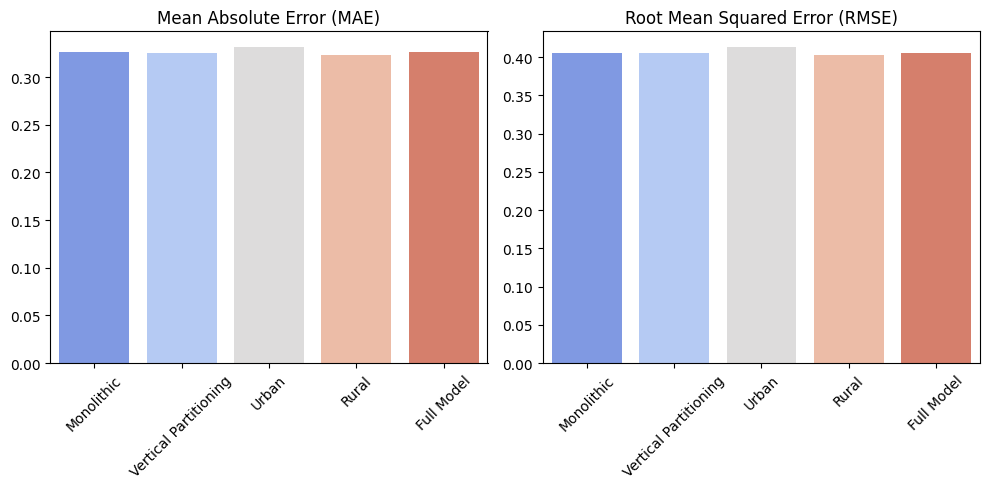

In [22]:
# Visualization of Model Performance
mae_values = [mae_original, mae_combined, mae_urban, mae_rural, mae_full]
rmse_values = [rmse_mae_original, rmse_mae_combined, rmse_urban, rmse_rural, rmse_full]
labels = ['Monolithic', 'Vertical Partitioning', 'Urban', 'Rural', 'Full Model']

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=labels, y=mae_values, hue=labels, palette='coolwarm', legend=False)
plt.title("Mean Absolute Error (MAE)")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x=labels, y=rmse_values, hue=labels, palette='coolwarm', legend=False)
plt.title("Root Mean Squared Error (RMSE)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Step: Insights on Horizontal Partitioning
**Urban towers**:
* Performance might be more stable due to better infrastructure, higher tower density, and advanced networking equipment.
* More users might lead to higher congestion, impacting latency and throughput.

**Rural towers**:
* Performance might be more variable due to less coverage, fewer users, and greater distances between towers.
* Some areas might have stronger signals due to less interference, but overall variability is higher.

**Why Our Results Might Differ?**

* The urban/rural mapping was randomly assigned, so the actual performance variation may not fully reflect real-world conditions.
* A more accurate study would require actual geospatial network data to classify localities properly.

## Benefits of Partitioning Approaches:

#### Horizontal Partitioning (Urban vs. Rural):

* Specialized models can capture unique patterns in different environments.
* Works best when geographic differences significantly affect network conditions.
* However, our results showed minimal improvement, suggesting that geography alone may not be the best partitioning factor.

#### Vertical Partitioning (Network vs. User Features):

* Splitting the model into network-based and user-based sub-models allows each to specialize in different aspects of latency prediction.
* Useful if network conditions and user behaviors affect latency independently.
* In our case, the improvement was minor, likely due to strong correlations between network and user features.

#### Monolithic Model:

* Remains competitive despite partitioning attempts.
* A well-optimized monolithic model can still perform well, but partitioning adds flexibility for further optimizations.

## Demostrate the parallel model processing

The horizontal and vertical partitioning was previously performed sequentially. Now, let's train the models in parallel.

In [18]:
from multiprocessing import Process, Manager
import numpy as np

# Function to train the models
def partitioned_model_process(shared_result_dict, model_name, model, X_train, y_train, X_test):
    """
    Model A and Model B will be processed.
    Store the result in the shared memory (shared_result).
    """
    print(f"Traning started for model {model_name}")
    # Re-initialize model within the process
    model = RandomForestRegressor(n_estimators=200, min_samples_split=10, min_samples_leaf=5, bootstrap=True, random_state=42, verbose=1)
    model.fit(X_train, y_train)

    # Store predictions in the shared dictionary
    shared_result_dict[model_name] = model.predict(X_test)
    print(f"\nTraning completed for model {model_name}")

if __name__ == "__main__":

    # Use a Manager to create a shared dictionary
    with Manager() as manager:
        result = manager.dict()

        # List to hold the processes
        processes = []

        # Vertical partitioning
        # Create and start a process for model A
        print("\ncreating process for model A")
        p = Process(target=partitioned_model_process, args=(result, 'model_A', model_A, X_A_train, y_A_train, X_A_test))
        processes.append(p)
        p.start()

        # Create and start a process for model B
        print("\ncreating process for model B")
        p = Process(target=partitioned_model_process, args=(result, 'model_B', model_B, X_B_train, y_B_train, X_B_test))
        processes.append(p)
        p.start()

        # Horizontal partitioning
        # Create and start a process for model_urban
        print("\ncreating process for model_urban")
        p = Process(target=partitioned_model_process, args=(result, 'model_urban', model_urban, X_urban_train, y_urban_train, X_urban_test))
        processes.append(p)
        p.start()

        # Create and start a process for model_rural
        print("\ncreating process for model_rural")
        p = Process(target=partitioned_model_process, args=(result, 'model_rural', model_rural, X_rural_train, y_rural_train, X_rural_test))
        processes.append(p)
        p.start()

        # Wait for all processes to finish
        for p in processes:
            p.join()

        print("All the models training are completed.")
        # Combine predictions for final latency prediction with horizontal partitioning, accessing from the dictionary
        final_predictions_parallel = (result['model_A'] + result['model_B']) / 2

        # Evaluate performance using Mean Absolute Error (MAE)
        mae_combined_parallel = mean_absolute_error(y_B_test, final_predictions_parallel)
        rmse_combined_parallel = np.sqrt(mean_squared_error(y_B_test, final_predictions_parallel))

        print("\n############# Vertical partitioning #################")
        print(f"MAE for monolithic model: {mae_original}")
        print(f"MAE for combined model: {mae_combined_parallel}")
        print(f"\nRMSE for combined model: {rmse_mae_original}")
        print(f"RMSE for combined model: {rmse_combined_parallel}")

        mae_urban_parallel = mean_absolute_error(y_urban_test, result['model_urban'])
        mae_rural_parallel = mean_absolute_error(y_rural_test, result['model_rural'])
        mae_full = mean_absolute_error(y_test, full_model_pred)
        rmse_urban_parallel = np.sqrt(mean_squared_error(y_urban_test, result['model_urban']))
        rmse_rural_parallel = np.sqrt(mean_squared_error(y_rural_test, result['model_rural']))
        rmse_full = np.sqrt(mean_squared_error(y_test, full_model_pred))

        print("\n############# Horizontal partitioning #################")
        print(f"MAE for urban model: {mae_urban_parallel}")
        print(f"MAE for rural model: {mae_rural_parallel}")
        print(f"MAE for full model: {mae_full}")

        print(f"\nRMSE for urban model: {rmse_urban_parallel}")
        print(f"RMSE for rural model: {rmse_rural_parallel}")
        print(f"RMSE for full model: {rmse_full}")


creating process for model A

creating process for model B
Traning started for model model_A
creating process for model_urban

Traning started for model model_B
creating process for model_rural

Traning started for model model_urban
Traning started for model model_rural


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   13.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   13.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   14.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.4s



Traning completed for model model_B


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   18.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   36.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s



Traning completed for model model_rural


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   37.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s



Traning completed for model model_urban


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   46.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s



Traning completed for model model_A
All the models training are completed.

############# Vertical partitioning #################
MAE for monolithic model: 0.3266625328868813
MAE for combined model: 0.32493664375707676

RMSE for combined model: 0.4051676914986686
RMSE for combined model: 0.40543976041362134

############# Horizontal partitioning #################
MAE for urban model: 0.33136605981849687
MAE for rural model: 0.3229613443770782
MAE for full model: 0.3266625328868813

RMSE for urban model: 0.413016288545477
RMSE for rural model: 0.4021204523297123
RMSE for full model: 0.4051676914986686


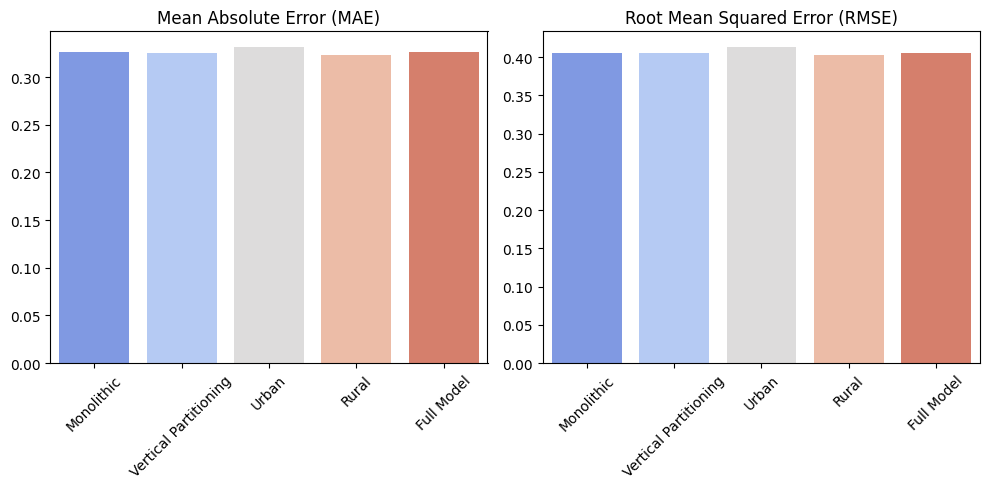

In [20]:
# Visualization of Model Performance
mae_values = [mae_original, mae_combined_parallel, mae_urban_parallel, mae_rural_parallel, mae_full]
rmse_values = [rmse_mae_original, rmse_combined_parallel, rmse_urban_parallel, rmse_rural_parallel, rmse_full]
labels = ['Monolithic', 'Vertical Partitioning', 'Urban', 'Rural', 'Full Model']

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=labels, y=mae_values, hue=labels, palette='coolwarm', legend=False)
plt.title("Mean Absolute Error (MAE)")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x=labels, y=rmse_values, hue=labels, palette='coolwarm', legend=False)
plt.title("Root Mean Squared Error (RMSE)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Since the results remain the same, the previous explanation still holds for parallel model training.

#### Parallel vs. Sequential Training:

Parallel training only optimizes computational efficiency but does not change the underlying data distribution or model behavior.
Since partitioning logic and data remain unchanged, the performance outcomes remain consistent.